2024-09-08 13:25:18.392873: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-09-08 13:25:18.461492: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-09-08 13:25:19.588236: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


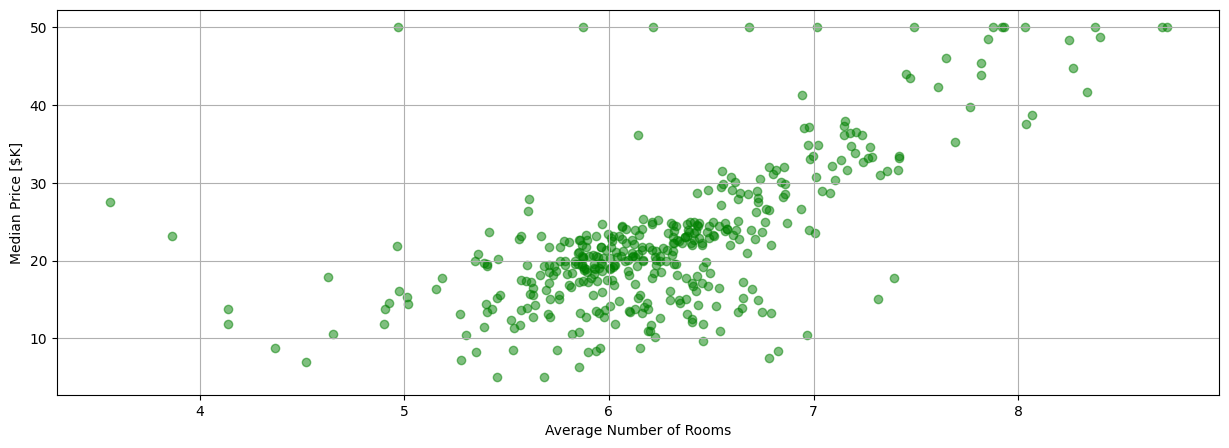

In [1]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Activation
from tensorflow.keras.datasets import boston_housing
from tensorflow.keras import layers
 
import tensorflow as tf
import matplotlib.pyplot as plt
SEED_VALUE = 42
 
# Fix seed to make training deterministic.
np.random.seed(SEED_VALUE)
tf.random.set_seed(SEED_VALUE)
(X_train, y_train), (X_test, y_test) = boston_housing.load_data()

boston_features = {
    'Average Number of Rooms':5,
}
 
X_train_1d = X_train[:, boston_features['Average Number of Rooms']]
X_test_1d = X_test[:, boston_features['Average Number of Rooms']]
X_train_2d = X_train[:, 5:7]
X_test_2d = X_test[:, 5:7]
plt.figure(figsize=(15, 5))
 
plt.xlabel('Average Number of Rooms')
plt.ylabel('Median Price [$K]')
plt.grid("on")
plt.scatter(X_train[:,5:6].flatten(), y_train, color='green',alpha=0.5);

In [2]:
model = Sequential()
 
# Define the model consisting of a single neuron.
#model.add(Dense(units=1, input_shape=(1,)))
model.add(tf.keras.layers.Dense(14,input_shape=(1,)))
#model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(1))
 
    
# Display a summary of the model architecture.
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 14)                28        
                                                                 
 dense_1 (Dense)             (None, 1)                 15        
                                                                 
Total params: 43 (172.00 Byte)
Trainable params: 43 (172.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [3]:
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=.1),
              loss='mae')

In [4]:
history = model.fit(X_train[:,5:6], 
                    y_train, 
                    batch_size=16, 
                    epochs=100, 
                    validation_split=0.3,
                    verbose=0)

In [5]:
model.evaluate(X_train[:,5:6],y_train)
model.evaluate(X_test[:,5:6],y_test)

4/4 [==============================] - 0s 2ms/step - loss: 4.6741


4.674118518829346

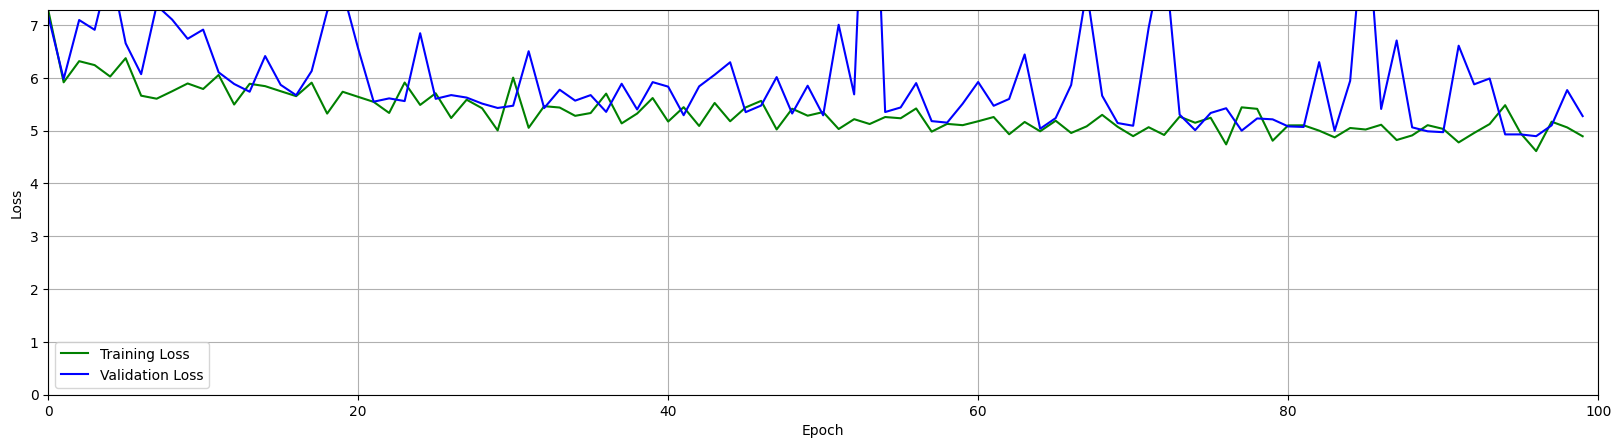

In [6]:
def plot_loss(history):
    plt.figure(figsize=(20,5))
    plt.plot(history.history['loss'], 'g', label='Training Loss')
    plt.plot(history.history['val_loss'], 'b', label='Validation Loss')
    plt.xlim([0, 100])
    plt.ylim([0, np.max(history.history['loss'])])
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)

plot_loss(history)   

In [8]:
# Predict the median price of a home with [3, 4, 5, 6, 7] rooms.
x = [3, 4, 5, 6, 7]
y_pred = model.predict(x)
for idx in range(len(x)):
    print("Predicted price of a home with {} rooms: ${}K".format(x[idx], int(y_pred[idx]*10)/10))



1/1 [==============================] - 0s 95ms/step
Predicted price of a home with 3 rooms: $-1.5K
Predicted price of a home with 4 rooms: $6.3K
Predicted price of a home with 5 rooms: $14.2K
Predicted price of a home with 6 rooms: $22.1K
Predicted price of a home with 7 rooms: $30.0K


In [9]:
x = tf.linspace(3, 9, 10)
 
# Use the model to predict the dependent variable.
y = model.predict(x)
x

1/1 [==============================] - 0s 45ms/step


<tf.Tensor: shape=(10,), dtype=float64, numpy=
array([3.        , 3.66666667, 4.33333333, 5.        , 5.66666667,
       6.33333333, 7.        , 7.66666667, 8.33333333, 9.        ])>

In [10]:
def plot_data(x_data, y_data, x, y, title=None):
     
    plt.figure(figsize=(15,5))
    plt.scatter(x_data, y_data, label='Ground Truth', color='green', alpha=0.5)
    plt.plot(x, y, color='k', label='Model Predictions')
    plt.xlim([3,9])
    plt.ylim([0,60])
    plt.xlabel('Average Number of Rooms')
    plt.ylabel('Price [$K]')
    plt.title(title)
    plt.grid(True)
    plt.legend()

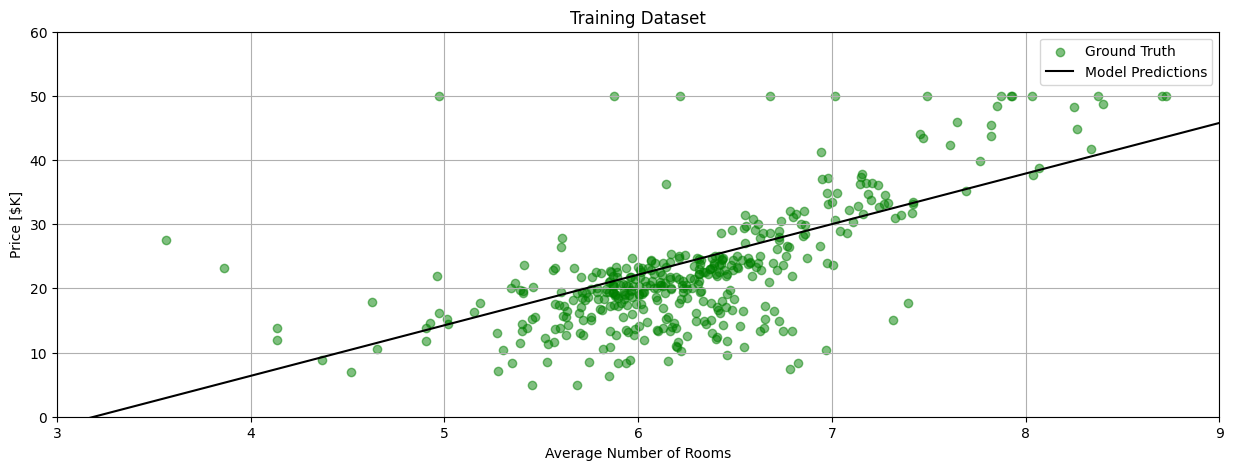

In [11]:
plot_data(X_train_1d, y_train, x, y, title='Training Dataset')

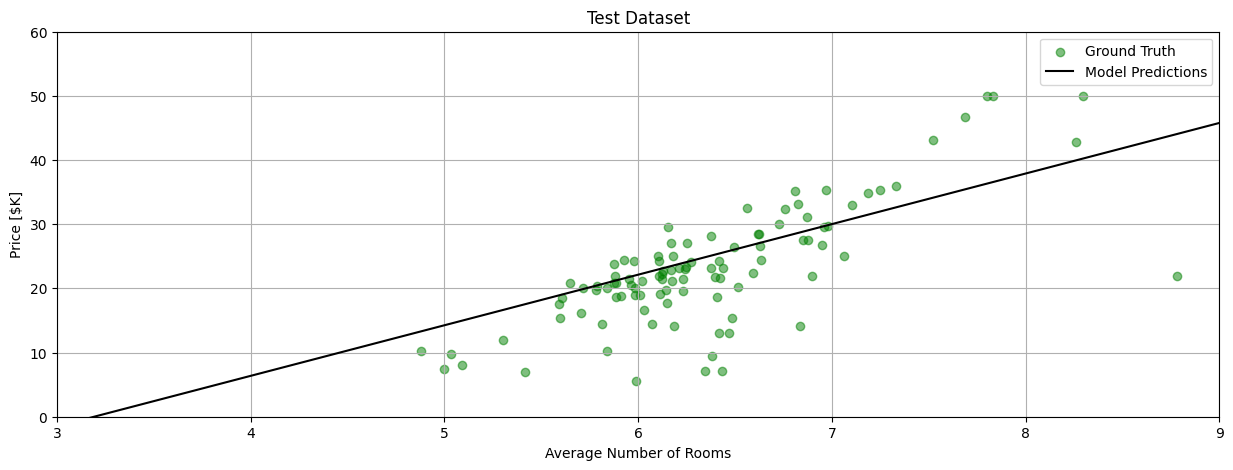

In [12]:
plot_data(X_test_1d, y_test, x, y, title='Test Dataset')